## Project Statement
You should implement an algorithm for computing the RF distance between two unrooted evolutionary trees over the same set of species. The algorithm can e.g. be Day's algorithm as explained in class. You should make a program called rfdist which as input takes two evolutionary trees in Newick format (also referred to as 'New Hampshire format'), and outputs the RF distance between them.

The archive testdata.zip contains two trees with RF-distance 8. These can e.g. be used for testing.
## Experiment

The programs QuickTree and RapidNJ are implementations of the NJ methods. QuickTree implements the basic cubic time algorithm while RapidNJ implements an algorithm the is faster in practice. You might want to take a look at the QuickTree paper and the RapidNJ paper.

Downloading quicktree_2.0.tar.gz and rapidnj-src-2.3.2.zip and compiling on a Linux-platform is straightforward (just run 'make'). 

The file patbase_aibtas.fasta contains 395 protein sequences from the P-Type ATPase Database in Fasta-format.

You should make an experiment where you first construct a number of trees for these 395 sequences using NJ (as implemented in QuickTree and RapidNJ) based on different multiple alignments of the 395 sequences, and secondly, compare the construted trees using your program rfdist in order to investigate the influence of using different multiple alignment methods and tree reconstruction methods. Biologically, the 395 sequences are grouped into five groups. The group which a sequenence belongs to is indicated by the first character (1-5) in its name in Fasta-file. If you visualize your constructed trees using e.g. the program Dendroscope, you might want to inspect to what extend sequences from one group are in the same subtree.

The alignment methods you most use are:

Clustal Omega: https://www.ebi.ac.uk/jdispatcher/msa/clustalo

Kalign: https://www.ebi.ac.uk/jdispatcher/msa/kalign

MUSCLE: https://www.ebi.ac.uk/jdispatcher/msa/muscle

You should use the default parameters of each program. Beware of the output format. QuickTree can only read multiple alignments in Stockholm-format, and RapidNJ can read multiple alignments in both Fasta- and single line Stockholm-format.

Converting to Stockholm-format: You can use the online converter available at http://hcv.lanl.gov/content/sequence/FORMAT_CONVERSION/form.html to convert different alignment formats to Stockholm- and Fasta-format. To convert to single line Stockholm-format, you must set the 'Output line width' to 'as wide as possible'. Update (Apr 2021): It seems that QuickTree 2.0 cannot read the Stockholm-format produced by the online converter. The problem is that the Stockholm-file constructed by the online converter starts with the line "# STOCKHOLM 1.0" follow by an empty line. If you remove these two lines, then QuickTree 2.0 can read the file. I do not know when this "bug" was introduced, but it used to work ;-)

*Experiment 1:* For each alignment method (Clustal Omega, Kalign, MUSCLE), you build a NJ tree using QuickTree and RapidNJ, and compute the RF-distance between each combination of these six trees. The outcome of your experiment, is an 6x6 table showing the RF-distance between each pair of constructed trees. (You might want to use the program Dendroscope to visualize the constructed trees.)

*Experiment 2:* Redo the above experiment where you use 395 input sequences in patbase_aibtas_permuted.fasta. This yields another 6x6 table.

*Experiment 3:* Compute the RF-distance between the trees produced in 'Experiment 1' and 'Experiment 2' using the same alignment and tree reconstruction method. This yields 6 distances.

Note: Depending on your Newick-parser, you might have problems comparing trees constructed by QuickTree and RapidNJ. The reason is that RapidNJ encloses the leaf names in apostrophes, while QuickTree does not. See e.g. these examples of a QuickTree newick output (quicktree.newick) and a RapidNJ newick output (rapidnj.newick) with names enclosed in apostrophes. It is easy to solve the problem by removing all apostrophes from the RapidNJ output. On a Unix-system like Linux or Mac OS X, you can easily do this by piping the output of RapidNJ through sed like this: rapidnj -i sth somealignment.stockholm | sed -e "s/'//g" > tree_without_apostrophes.newick

## Report

You (i.e. your group) must hand in a report (in pdf-format) and your implementation of rfdist (in a zip-archive) via Brightspace no later than Tuesday, April 16, 2024, at 23:59. Your report should be no more than 3 pages, and must cover:

Status of your work.

A short description of your implementation of rfdist, explaning what algorithm you implemented, how you read in trees in Newick-format, how you validated the correctness of your implementation, and how to access and run your program rfdist.
References to the 6 alignments (in Stockholm-format) and trees (in Newick-format) that you have produced in Experiment 1 and 2.
Your results of Experiment 1-3, i.e. an 6x6 table showing the RF-distance between each pair of constructed trees based on the patbase_aibtas.fasta, an 6x6 table showing the RF-distance between each pair of constructed trees based on the patbase_aibtas_permuted.fasta, and a 1x6 table showing the RF-distance between the trees constructed based on the same alignment and NJ method for normal and the permuted dataset. Comment on your results. Is everything as expected, or are you surprised?


## Day's algorithm 

In [77]:
from Bio import Phylo
tree1 = Phylo.read("../Testdata/tree1.new", "newick")
tree2 = Phylo.read("../Testdata/tree2.new", "newick")

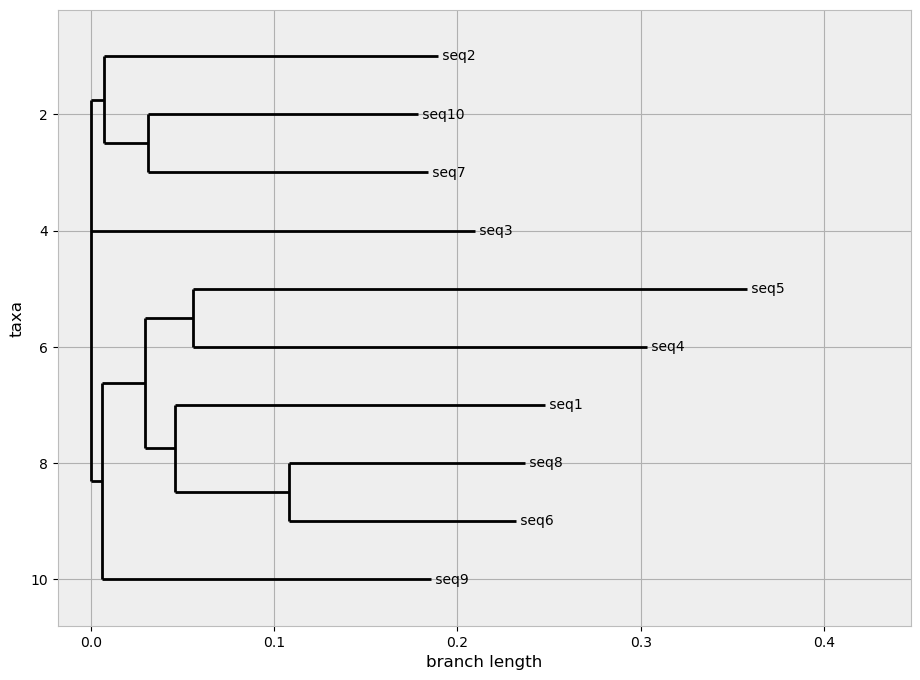

In [78]:
Phylo.draw(tree1)

In [79]:
order = 0
clade_dict = {}
for clade in tree1.find_clades():
    if clade.name:
        clade_dict[clade.name] = order
        order += 1
clade_dict


{'seq2': 0,
 'seq10': 1,
 'seq7': 2,
 'seq3': 3,
 'seq5': 4,
 'seq4': 5,
 'seq1': 6,
 'seq8': 7,
 'seq6': 8,
 'seq9': 9}

In [80]:
# annotate the names in tree2 with the order in tree1
for clade in tree2.find_clades():
    if clade.name:
        clade.name = (clade.name, clade_dict[clade.name])
        print(clade.name)

('seq1', 6)
('seq10', 1)
('seq7', 2)
('seq3', 3)
('seq5', 4)
('seq4', 5)
('seq2', 0)
('seq8', 7)
('seq6', 8)
('seq9', 9)


In [85]:
# check each clade in tree2 with:
# if max - min + 1 == len(clade_dict), then the clade is a subset of tree1
# RF = len(tree1) + len(tree2) - 2 * (number of common clades)

common_clades = 0
for clade in tree2.find_clades():
    if clade.name:
        if clade.name[1] in clade_dict.values():
            common_clades += 1


In [86]:
common_clades

10

In [2]:
class Node:
    def __init__(self, name, distance=None):
        self.name = name
        self.distance = distance  # Distance from the parent
        self.children = []


In [ ]:

def parse_newick(filepath):
    with open(filepath, 'r') as file:
        newick_lines = file.read().splitlines()  # List of lines

    # Join the lines back into a single string
    newick_str = ' '.join(newick_lines) 
    # make the string into a tree with the Node class...

# Example Usage
filepath = "../Testdata/tree1.new" 
tree_root = parse_newick(filepath)


In [7]:
def parse_newick(newick_str):
    """Parses a Newick tree string and returns the root node of the tree.

    Args:
        newick_str: A string representation of a Newick tree.

    Returns:
        The root node of the parsed tree.
    """

    stack = []
    current_node = None

    for token in newick_str.split():
        if token == '(':
            # Create a new child node
            new_node = Node(token.strip('('))
            if current_node:
                current_node.children.append(new_node)
            stack.append(current_node)
            current_node = new_node
        elif token == ',':
            # Move to the sibling of the current node
            current_node = stack.pop()
        elif token == ')':
            # Move to the parent of the current node
            current_node = stack.pop()
        elif token.isdigit():
            # Set the distance for the current node
            current_node.distance = float(token)
        else:
            # Leaf node
            current_node = Node(token)
            if stack:
                stack[-1].children.append(current_node)

    return current_node


In [12]:
# Example Newick string
newick_str = "((A,0.1)B,0.2)C;"  

# Parse the tree
tree_root = parse_newick(newick_str)


print(tree_root.children)


[]


In [45]:
def build_subtree(tokens):
    if tokens[0] == '(':
        tokens.pop(0)  # Remove opening parenthesis
        clade = []
        while tokens[0] != ')':
            subtree, tokens = build_subtree(tokens)  # Recurse for subtrees
            clade.append(subtree)         
        tokens.pop(0)  # Remove closing parenthesis
        return clade, tokens
    else:
        name = tokens.pop(0)
        return name, tokens  # Leaf node (taxa name)

def parse_newick(newick_str):
    tokens = newick_str.strip().replace(',', ' ').split()
    print(tokens)
    return build_subtree(tokens)




In [53]:
with open('../Testdata/tree1.new', 'r') as f:
    tree1_str = f.read()
with open('../Testdata/tree2.new', 'r') as f:
    tree2_str = f.read()

tree1_str

'(\n(\nseq2:0.18258,\n(\nseq10:0.14710,\nseq7:0.15261)\n:0.02441)\n:0.00702,\nseq3:0.20934,\n(\n(\n(\nseq5:0.30207,\nseq4:0.24793)\n:0.02587,\n(\nseq1:0.20160,\n(\nseq8:0.12843,\nseq6:0.12375)\n:0.06209)\n:0.01638)\n:0.02352,\nseq9:0.17922)\n:0.00628);\n'

In [39]:
from Bio import Phylo

def calculate_rf_distance(tree1_filepath, tree2_filepath):

    with open(tree1_filepath, 'r') as f:
        tree1_str = f.read()
    with open(tree2_filepath, 'r') as f:
        tree2_str = f.read()
    tree1 = parse_newick(tree1_str)
    tree2 = parse_newick(tree2_str)

    def get_splits(tree):
        splits = set()
        for clade in tree: 
            if isinstance(clade, list):  # Internal node
                child_clades = clade
                if len(child_clades) >= 2:  # At least two children
                    taxa1 = [c for c in child_clades[0] if isinstance(c, str)]
                    taxa2 = [c for c in child_clades[1:] if isinstance(c, str)]
                    splits.add(frozenset([frozenset(taxa1), frozenset(taxa2)]))
                elif len(child_clades) == 1 and isinstance(child_clades[0], str): 
                    # Special Case: Single child clade with a name
                    splits.add(frozenset([frozenset({child_clades[0]})]))  
        return splits





    splits1 = get_splits(tree1)
    splits2 = get_splits(tree2)

    return len(splits1.symmetric_difference(splits2))  # RF Distance




In [40]:
calculate_rf_distance('../Testdata/tree1.new', '../Testdata/tree2.new')

Newick String: (
(
seq2:0.18258,
(
seq10:0.14710,
seq7:0.15261)
:0.02441)
:0.00702,
seq3:0.20934,
(
(
(
seq5:0.30207,
seq4:0.24793)
:0.02587,
(
seq1:0.20160,
(
seq8:0.12843,
seq6:0.12375)
:0.06209)
:0.01638)
:0.02352,
seq9:0.17922)
:0.00628);



IndexError: list index out of range

In [51]:
from Bio import Phylo

def robinson_foulds_distance(tree1_str, tree2_str):
    """Calculates the Robinson-Foulds distance between two Newick trees.

    Args:
        tree1_str (str): The first tree in Newick format.
        tree2_str (str): The second tree in Newick format.

    Returns:
        int: The Robinson-Foulds distance between the two trees.
    """

    tree1 = Phylo.read(tree1_str, "newick")
    tree2 = Phylo.read(tree2_str, "newick")

    def get_bipartitions(tree):
        """Extracts all bipartitions (splits) defined by the tree."""
        bipartitions = set()
        for clade in tree.get_nonterminals():
            clade_tips = {tip.name for tip in clade.get_terminals()}
            rest_tips = {tip.name for tip in tree.get_terminals()} - clade_tips
            bipartitions.add(frozenset([clade_tips, rest_tips]))
        return bipartitions

    bipartitions1 = get_bipartitions(tree1)
    bipartitions2 = get_bipartitions(tree2)

    # Robinson-Foulds distance is the sum of splits present in one tree
    # but not the other, and vice versa.
    rf_distance = len(bipartitions1.symmetric_difference(bipartitions2))

    return rf_distance


distance = robinson_foulds_distance('../Testdata/tree1.new', '../Testdata/tree2.new')
print("Robinson-Foulds distance:", distance)


TypeError: unhashable type: 'set'